## 3D PLOT

In [51]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pytransform3d.rotations as pr

# if you want to work with the plot enable the widget
%matplotlib widget

In [21]:
make_line = lambda u, v: np.vstack((u, v)).T

In [82]:
offset1 = np.array([0, 0, 0])

Define 3d plot settings, set range for the graphic, set the camera center, set legend and show the camera/s.

C:\Users\i_iva\AppData\Local\Temp\ipykernel_13756\2706991511.py:48: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10, 8))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Rx
 [[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
Ry
 [[-1.0000000e+00  0.0000000e+00  1.2246468e-16]
 [ 0.0000000e+00  1.0000000e+00  0.0000000e+00]
 [-1.2246468e-16  0.0000000e+00 -1.0000000e+00]]
Rz
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
phi = 1.5707963267948966
theta  = 0.7853981633974483
psi = 1.5707963267948966
[[ 0.   -0.    1.  ]
 [ 0.71  0.71 -0.  ]
 [-0.71  0.71  0.  ]]


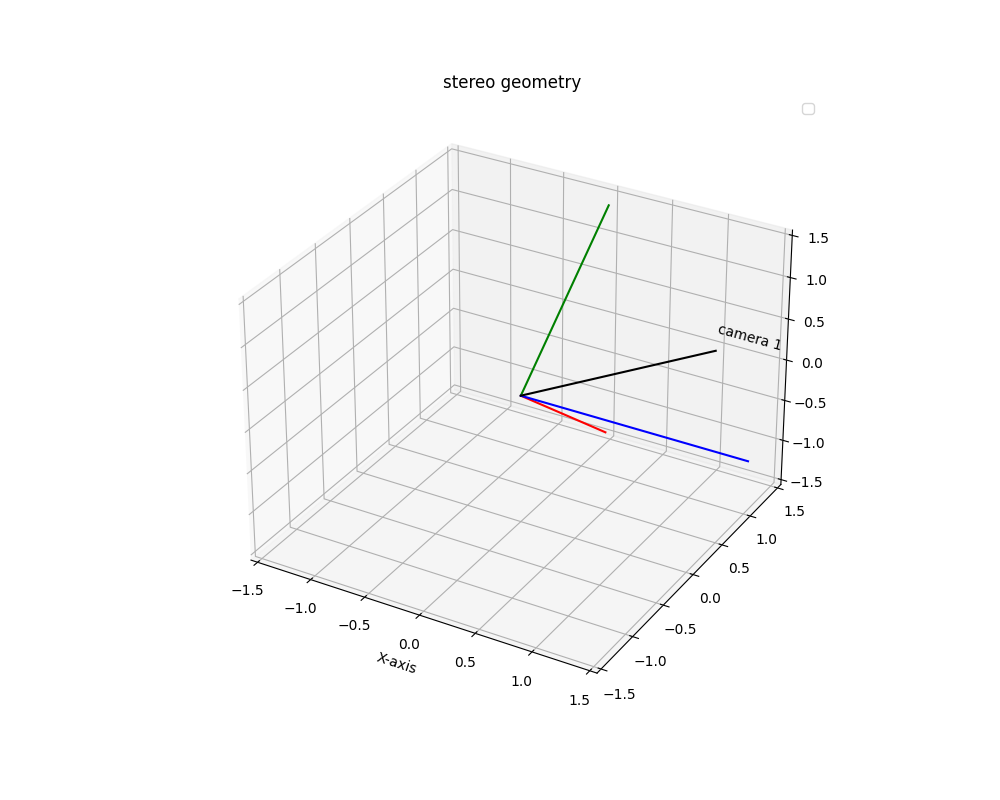

In [94]:
# https://www.meccanismocomplesso.org/en/3d-rotations-and-euler-angles-in-python/

def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

# calculata only rotation around x axis
Rx_ = Rx(m.pi/2)

# calculata only rotation around y axis
Ry_ = Ry(m.pi)

# calculata only rotation around z axis
Rz_ = Rz(m.pi/4)


## 
print('Rx\n', Rx_)
print('Ry\n', Ry_)
print('Rz\n', Rz_)

# calculate triple of the angles
phi = m.pi/2
theta = m.pi/4
psi = m.pi/2
print("phi =", phi)
print("theta  =", theta)
print("psi =", psi)

R_ = Rz(psi) * Ry(theta) * Rx(phi)
# round the result .xx
print(np.round(R_, decimals=2))

####### visualisation #########

# define axis and figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111,projection='3d')

# set limits

# camera 1
ax.set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5), zlim=(-1.5, 1.5))
# camera 2
# ax.set(xlim=(-2, 2), ylim=(-2, 2), zlim=(-2, 2))

# plot both the camera centers
ax = pr.plot_basis(ax=ax, R=R_, p=offset1, s=2, ax_s=3, label="camera 1")

ax.set_title("stereo geometry")
ax.set_xlabel("X-axis")

plt.legend()
plt.show()